<a href="https://colab.research.google.com/github/adrian-pieroni/challenge2-data-science-LATAM/blob/main/challenge2_data_science_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge - Telecom X: Evasi√≥n de Clientes (Churn)
##Este notebook forma parte de mi proceso de aprendizaje en an√°lisis de datos,
##como parte del programa Oracle Next Education de Alura Latam.

In [1]:
!git clone https://github.com/adrian-pieroni/challenge2-data-science-LATAM.git

Cloning into 'challenge2-data-science-LATAM'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 54 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 261.21 KiB | 2.33 MiB/s, done.
Resolving deltas: 100% (27/27), done.


#üìå Extracci√≥n




In [11]:
import os           # Manejo de rutas de archivos
import json         # Lectura de archivos JSON
from itertools import groupby  # Agrupaci√≥n de secuencias ordenadas

In [12]:
import pandas as pd     # An√°lisis y manipulaci√≥n de datos estructurados
import numpy as np      # Operaciones matem√°ticas y arrays

In [13]:
import seaborn as sns   # Visualizaci√≥n estad√≠stica avanzada
import matplotlib.pyplot as plt  # Visualizaci√≥n base y personalizaci√≥n
import matplotlib.ticker as mtick # Formateo de ejes en gr√°ficos
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [18]:
df =pd.read_json('/content/challenge2-data-science-LATAM/TelecomX_Data.json')
df

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [21]:
# Lista de columnas detectadas en exploracion
columnas_con_dict = ['customer', 'phone', 'internet', 'account']

# Expandir columnas
for columna in columnas_con_dict:
    columnas_expandida = pd.json_normalize(df[columna])
    columnas_expandida.columns = [f"{columna}.{subcol}" for subcol in columnas_expandida.columns]

    df = pd.concat([df, columnas_expandida], axis=1)
    df.drop(columns=[columna], inplace=True)

# Mostrar columnas
print("Columnas despu√©s de desanidar:")
print(df.columns)

Columnas despu√©s de desanidar:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [22]:
df.columns = df.columns.str.replace('.', '_')

In [23]:
columnas_expandidas = []
for col in columnas_con_dict:
    columnas_expandidas.extend([c for c in df.columns if c.startswith(col + '_')])

# Eliminar filas que tengan valores nulos en alguna de las columnas expandidas
df = df.dropna(subset=columnas_expandidas)
print(f"Filas restantes despu√©s de eliminar nulos en columnas anidadas: {df.shape[0]}")

Filas restantes despu√©s de eliminar nulos en columnas anidadas: 7267


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [28]:
print(df.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')


In [29]:
print(df.dtypes)

customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object


In [30]:
duplicados = df.duplicated().sum()
print(f"N√∫mero de filas duplicadas: {duplicados}")

N√∫mero de filas duplicadas: 0


In [31]:
if duplicados > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados.")
else:
    print("No se encontraron duplicados.")

No se encontraron duplicados.


In [33]:
nulos = df.isnull().sum()
print("Valores nulos por columna:\n", nulos)
print(f"Total de filas en df: {df.shape[0]}")

Valores nulos por columna:
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64
Total de filas en df: 7267


In [34]:
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

print("Tipos de datos despu√©s de la conversi√≥n:")
print(df[['account_Charges_Monthly', 'account_Charges_Total']].dtypes)

print("\nValores de ejemplo:")
print(df[['account_Charges_Monthly', 'account_Charges_Total']].head())

Tipos de datos despu√©s de la conversi√≥n:
account_Charges_Monthly    float64
account_Charges_Total      float64
dtype: object

Valores de ejemplo:
   account_Charges_Monthly  account_Charges_Total
0                     65.6                 593.30
1                     59.9                 542.40
2                     73.9                 280.85
3                     98.0                1237.85
4                     83.9                 267.40


In [35]:
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

In [36]:
df['Churn'] = df['Churn'].replace(['', ' ', 'None'], np.nan)

In [37]:
df = df.dropna(subset=['Churn'])

In [38]:
nulos_totales = df.isnull().sum()
nulos_porcentaje = (nulos_totales / len(df)) * 100
nulos_df = pd.DataFrame({'Nulos': nulos_totales, 'Porcentaje': nulos_porcentaje})
nulos_df = nulos_df[nulos_df['Nulos'] > 0].sort_values(by='Nulos', ascending=False)

print("Resumen de columnas con valores nulos:")
print(nulos_df)

Resumen de columnas con valores nulos:
                       Nulos  Porcentaje
account_Charges_Total     11    0.156183


In [40]:
filas, columnas = df.shape
shape_texto = f"{filas} filas x {columnas} columnas"

tabla_resumen = pd.DataFrame({
    "Columnas disponibles": df.columns.tolist(),
    "Shape del DataFrame": [shape_texto] + [""] * (len(df.columns) - 1)
})


display(tabla_resumen)

Columnas disponibles       Shape del DataFrame
0                  customerID  7043 filas x 22 columnas
1                       Churn                          
2             customer_gender                          
3      customer_SeniorCitizen                          
4            customer_Partner                          
5         customer_Dependents                          
6             customer_tenure                          
7          phone_PhoneService                          
8         phone_MultipleLines                          
9    internet_InternetService                          
10    internet_OnlineSecurity                          
11      internet_OnlineBackup                          
12  internet_DeviceProtection                          
13       internet_TechSupport                          
14       internet_StreamingTV                          
15   internet_StreamingMovies                          
16           account_Contract                          
17   account_PaperlessBilling                          
18      account_PaymentMethod                          
19    account_Charges_Monthly                          
20      account_Charges_Total                          
21            Cuentas_Diarias

In [41]:
columnas_ordenadas = sorted(df.columns, key=lambda x: x.split('_')[0])

print("Columnas en df_limpio (agrupadas por categor√≠a):\n")
for i, col in enumerate(columnas_ordenadas, 1):
    print(f"{i:2d}. {col}")

Columnas en df_limpio (agrupadas por categor√≠a):

 1. Churn
 2. Cuentas_Diarias
 3. account_Contract
 4. account_PaperlessBilling
 5. account_PaymentMethod
 6. account_Charges_Monthly
 7. account_Charges_Total
 8. customer_gender
 9. customer_SeniorCitizen
10. customer_Partner
11. customer_Dependents
12. customer_tenure
13. customerID
14. internet_InternetService
15. internet_OnlineSecurity
16. internet_OnlineBackup
17. internet_DeviceProtection
18. internet_TechSupport
19. internet_StreamingTV
20. internet_StreamingMovies
21. phone_PhoneService
22. phone_MultipleLines


In [42]:
df_limpio = df.copy()

In [43]:
try:
    df_limpio.to_csv('TelecomX_df_limpio.csv', index=False)
    print("Archivo guardado como 'TelecomX_df_limpio.csv'")
except Exception as e:
    print(f"Error al guardar CSV: {e}")

Archivo guardado como 'TelecomX_df_limpio.csv'


In [44]:
# Seleccionar columnas tipo objeto (categ√≥ricas)
columnas_objeto = df_limpio.select_dtypes(include='object').columns

binarias = []
no_binarias = []

# Identificar variables binarias con valores 'Yes' y 'No'
for col in columnas_objeto:
    valores = sorted(df_limpio[col].dropna().unique())
    if set(valores) == {'No', 'Yes'}:
        binarias.append((col, valores))
    else:
        no_binarias.append((col, valores))

# Mostrar columnas binarias
print("Columnas con valores √∫nicos 'Yes' y 'No':\n" + "-"*50)
for col, vals in binarias:
    print(f"\U0001F7E2 {col:<25}: {vals}")

# Mostrar columnas no binarias
print("\nColumnas NO binarias:\n" + "-"*50)
for col, vals in no_binarias:
    cantidad = len(vals)
    ejemplos = ', '.join(map(str, vals[:3]))
    extra = f"... (+{cantidad - 4})" if cantidad > 4 else ""
    print(f"\U0001F534 {col:<25}: {cantidad} √∫nicos (Ej: {ejemplos} {extra})")

Columnas con valores √∫nicos 'Yes' y 'No':
--------------------------------------------------
üü¢ Churn                    : ['No', 'Yes']
üü¢ customer_Partner         : ['No', 'Yes']
üü¢ customer_Dependents      : ['No', 'Yes']
üü¢ phone_PhoneService       : ['No', 'Yes']
üü¢ account_PaperlessBilling : ['No', 'Yes']

Columnas NO binarias:
--------------------------------------------------
üî¥ customerID               : 7043 √∫nicos (Ej: 0002-ORFBO, 0003-MKNFE, 0004-TLHLJ ... (+7039))
üî¥ customer_gender          : 2 √∫nicos (Ej: Female, Male )
üî¥ phone_MultipleLines      : 3 √∫nicos (Ej: No, No phone service, Yes )
üî¥ internet_InternetService : 3 √∫nicos (Ej: DSL, Fiber optic, No )
üî¥ internet_OnlineSecurity  : 3 √∫nicos (Ej: No, No internet service, Yes )
üî¥ internet_OnlineBackup    : 3 √∫nicos (Ej: No, No internet service, Yes )
üî¥ internet_DeviceProtection: 3 √∫nicos (Ej: No, No internet service, Yes )
üî¥ internet_TechSupport     : 3 √∫nicos (Ej: No, No internet 

In [45]:
df_binario = df_limpio.copy()

In [46]:
# Detectar valores no reconocidos en 'Churn'
valores_unicos = df_binario['Churn'].unique()
if pd.isnull(valores_unicos).any():
    print("Algunos valores de 'Churn' no fueron reconocidos y se asignaron como NaN.")
    print("Valores √∫nicos despu√©s del mapeo:", valores_unicos)

In [48]:
col = 'Churn'

# Limpiar texto
df_binario[col] = df_binario[col].astype(str).str.strip().str.capitalize()

# Verificar si hay valores inesperados
valores_esperados = {'Yes', 'No'}
valores_actuales = set(df_binario[col].unique())

valores_no_controlados = valores_actuales - valores_esperados

if valores_no_controlados:
    print(f"Atenci√≥n: Se encontraron valores no v√°lidos en '{col}': {valores_no_controlados}")

else:
    # Mapear
    df_binario[col] = df_binario[col].map({'Yes': 1, 'No': 0})
    print(f"'{col}' mapeada correctamente. Valores √∫nicos: {df_binario[col].unique()}")

'Churn' mapeada correctamente. Valores √∫nicos: [0 1]


In [49]:
columnas_binarias = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Aplicar transformaci√≥n binaria 1/0
for col in columnas_binarias:
    if col in df_binario.columns:
        df_binario[col] = df_binario[col].str.strip().str.capitalize()
        df_binario[col] = df_binario[col].map({'Yes': 1, 'No': 0})
        nulos = df_binario[col].isnull().sum()
        if nulos > 0:
            print(f"Columna '{col}' tiene {nulos} valores no reconocidos tras la conversi√≥n.")
    else:
        print(f"Advertencia: la columna '{col}' no existe en df_binario.")


# Verificaci√≥n
print("\nTransformaci√≥n de variables binarias completada.\nValores √∫nicos por columna (esperado: [0, 1]):\n")
for col in columnas_binarias:
    if col in df_binario.columns:
        valores_unicos = df_binario[col].dropna().unique()
        print(f"   - {col}: {valores_unicos}")

Columna 'phone_MultipleLines' tiene 682 valores no reconocidos tras la conversi√≥n.
Columna 'internet_OnlineSecurity' tiene 1526 valores no reconocidos tras la conversi√≥n.
Columna 'internet_OnlineBackup' tiene 1526 valores no reconocidos tras la conversi√≥n.
Columna 'internet_DeviceProtection' tiene 1526 valores no reconocidos tras la conversi√≥n.
Columna 'internet_TechSupport' tiene 1526 valores no reconocidos tras la conversi√≥n.
Columna 'internet_StreamingTV' tiene 1526 valores no reconocidos tras la conversi√≥n.
Columna 'internet_StreamingMovies' tiene 1526 valores no reconocidos tras la conversi√≥n.

Transformaci√≥n de variables binarias completada.
Valores √∫nicos por columna (esperado: [0, 1]):

   - customer_Partner: [1 0]
   - customer_Dependents: [1 0]
   - phone_PhoneService: [1 0]
   - phone_MultipleLines: [0. 1.]
   - internet_OnlineSecurity: [0. 1.]
   - internet_OnlineBackup: [1. 0.]
   - internet_DeviceProtection: [0. 1.]
   - internet_TechSupport: [1. 0.]
   - interne

In [51]:
columnas_binarias = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

df[columnas_binarias].isna().sum()

customer_Partner             0
customer_Dependents          0
phone_PhoneService           0
phone_MultipleLines          0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_PaperlessBilling     0
dtype: int64

In [52]:
try:
    df_binario.to_csv("TelecomX_df_binario.csv", index=False)
    print("Archivo 'TelecomX_df_binario.csv' guardado correctamente.")
except Exception as e:
    print(f"Error al guardar CSV binario: {e}")

Archivo 'TelecomX_df_binario.csv' guardado correctamente.



#üîß Transformaci√≥n


#üìä Carga y an√°lisis

¬øCu√°ntos clientes hay en total?

In [54]:
total_clientes = df_limpio.shape[0]
print(f"Total de clientes: {total_clientes}")

Total de clientes: 7043


¬øCu√°l es la proporci√≥n general de clientes que abandonan la compa√±√≠a?

In [55]:
# 1. Calcular total de clientes
total_clientes = df_limpio.shape[0]

# 2. Calcular proporci√≥n
churn_counts = df_limpio['Churn'].value_counts(normalize=True)

# 3. Crear DataFrame
resumen_churn = pd.DataFrame({
    'Estado Cliente': ['Abandonaron', 'Se Mantuvieron'],
    'Proporci√≥n (%)': [churn_counts.get('Yes', 0) * 100, churn_counts.get('No', 0) * 100]
})

resumen_churn['Proporci√≥n (%)'] = resumen_churn['Proporci√≥n (%)'].map('{:.2f}%'.format)

print(f"Total de clientes: {total_clientes}\n")
print(resumen_churn)

Total de clientes: 7043

   Estado Cliente Proporci√≥n (%)
0     Abandonaron         26.54%
1  Se Mantuvieron         73.46%


2.1 Gr√°fico de clientes que abandonaron

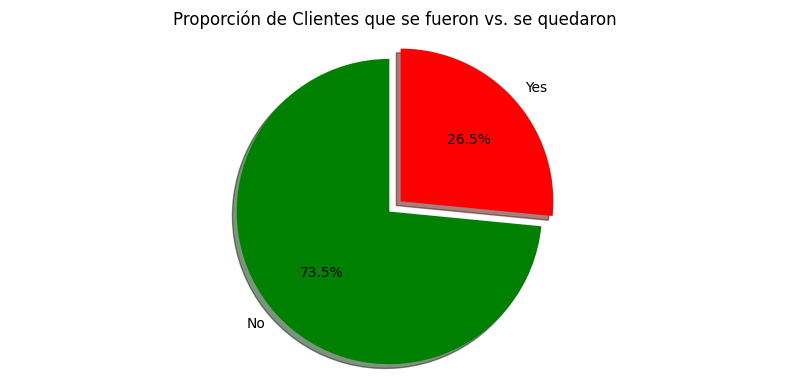

In [56]:
# Valores y etiquetas
valores = df_limpio['Churn'].value_counts()
etiquetas = valores.index
colores = ['green', 'red']

plt.figure(figsize=(8, 4))
plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    explode=(0, 0.1),  # Resaltar la porci√≥n de clientes que se fueron
    shadow=True
)

plt.title('Proporci√≥n de Clientes que se fueron vs. se quedaron')
plt.axis('equal')
plt.tight_layout()
plt.show()

Servicios m√°s contratados por los clientes

¬øQu√© servicios son los m√°s contratados por los clientes?

In [57]:
servicios = ['phone_PhoneService', 'internet_InternetService']

for servicio in servicios:
    conteo = df_limpio[servicio].value_counts()
    proporciones = df_limpio[servicio].value_counts(normalize=True) * 100

    resumen = pd.DataFrame({
        'Cantidad': conteo,
        'Porcentaje (%)': proporciones.map('{:.2f}%'.format)
    })

    print(f"Servicio: {servicio}")
    display(resumen)
    print("\n")

Servicio: phone_PhoneService


Cantidad Porcentaje (%)
phone_PhoneService                         
Yes                     6361         90.32%
No                       682          9.68%



Servicio: internet_InternetService


Cantidad Porcentaje (%)
internet_InternetService                         
Fiber optic                   3096         43.96%
DSL                           2421         34.37%
No                            1526         21.67%

Distribuci√≥n de churn seg√∫n g√©nero
¬øExiste diferencia en la tasa de abandono entre hombres y mujeres?

In [58]:
df_limpio.groupby(['customer_gender', 'Churn']).size().unstack()

Churn              No  Yes
customer_gender           
Female           2549  939
Male             2625  930

Visualizaci√≥n del churn por g√©nero

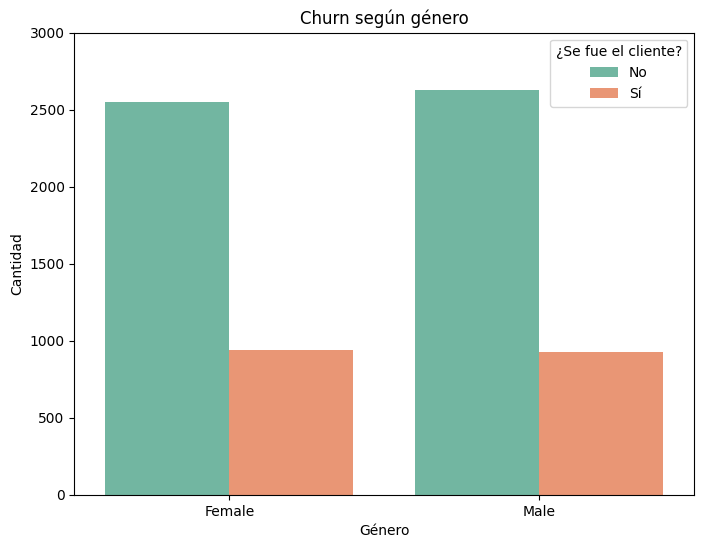

G√©neros encontrados: ['Female' 'Male']


In [59]:

df_limpio['Churn_Label'] = df_limpio['Churn'].map({'No': 'No', 'Yes': 'S√≠'})

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_limpio,
    x='customer_gender',
    hue='Churn_Label',
    palette='Set2'
)

plt.title('Churn seg√∫n g√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Cantidad')
plt.ylim(0, 3000)
plt.legend(title='¬øSe fue el cliente?')
plt.show()

print("G√©neros encontrados:", df_limpio['customer_gender'].unique())

Proporci√≥n de churn por g√©nero
¬øQu√© g√©nero tiene mayor proporci√≥n de churn?

In [60]:
df_genero_churn = df_limpio.groupby('customer_gender')['Churn'].value_counts(normalize=True).unstack()

df_genero_churn_pct = df_genero_churn * 100
df_genero_churn_pct = df_genero_churn_pct.round(2)

print("Proporci√≥n de clientes que abandonaron (Churn) y que permanecieron, por g√©nero (%):")
display(df_genero_churn_pct)

Proporci√≥n de clientes que abandonaron (Churn) y que permanecieron, por g√©nero (%):


Churn               No    Yes
customer_gender              
Female           73.08  26.92
Male             73.84  26.16

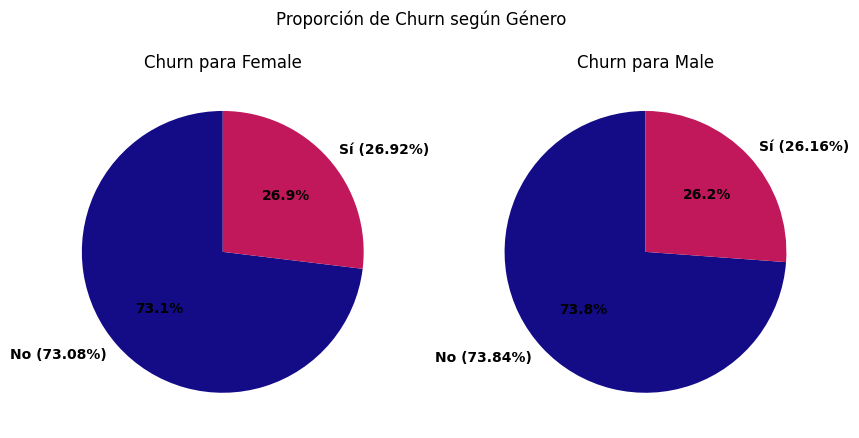

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

colores = ["#140C87", "#C1175B"]

for i, gender in enumerate(df_genero_churn_pct.index):
    axes[i].pie(df_genero_churn_pct.loc[gender],
                labels=[f"No ({df_genero_churn_pct.loc[gender, 'No']}%)",
                        f"S√≠ ({df_genero_churn_pct.loc[gender, 'Yes']}%)"],
                colors=colores,
                autopct='%1.1f%%', startangle=90, textprops={'weight':'bold'})
    axes[i].set_title(f'Churn para {gender}')

plt.suptitle('Proporci√≥n de Churn seg√∫n G√©nero')
plt.show()

Permanencia media por g√©nero
¬øHay diferencias en la permanencia promedio entre hombres y mujeres?

In [62]:
permanencia_por_genero = df_limpio.groupby('customer_gender')['customer_tenure'].mean().round(1)
print(permanencia_por_genero)

customer_gender
Female    32.2
Male      32.5
Name: customer_tenure, dtype: float64



Distribuci√≥n general de g√©nero en la base
¬øHay alg√∫n patr√≥n demogr√°fico evidente en los datos?

In [63]:
distribucion_genero = df_limpio['customer_gender'].value_counts(normalize=True) * 100
distribucion_genero = distribucion_genero.round(2).astype(str) + '%'
display(distribucion_genero)

customer_gender
Male      50.48%
Female    49.52%
Name: proportion, dtype: object

üìä 3.3 Servicios contratados
Esta secci√≥n analiza la relaci√≥n entre el churn (abandono) y los servicios contratados por los clientes, incluyendo tel√©fono, internet, servicios adicionales y combinaciones.

Tasa de abandono seg√∫n contrataci√≥n de tel√©fono e internet
¬øLos clientes que contratan servicios de tel√©fono/internet tienen mayor tasa de abandono?

In [64]:
def churn_por_servicio(servicios, df):
    for servicio in servicios:
        print(f"\n--- Churn por '{servicio}' ---")
        tabla = pd.crosstab(df[servicio], df['Churn'], normalize='index') * 100
        tabla = tabla.round(1).fillna(0)
        total_clientes = df[servicio].value_counts()
        tabla['Total'] = total_clientes
        tabla = tabla[['No', 'Yes', 'Total']]
        tabla.columns = ['Se quedaron (%)', 'Se fueron (%)', 'Total']
        print(tabla.to_string())

servicios_basicos = ['phone_PhoneService', 'internet_InternetService']

churn_por_servicio(servicios_basicos, df_limpio)


--- Churn por 'phone_PhoneService' ---
                    Se quedaron (%)  Se fueron (%)  Total
phone_PhoneService                                       
No                             75.1           24.9    682
Yes                            73.3           26.7   6361

--- Churn por 'internet_InternetService' ---
                          Se quedaron (%)  Se fueron (%)  Total
internet_InternetService                                       
DSL                                  81.0           19.0   2421
Fiber optic                          58.1           41.9   3096
No                                   92.6            7.4   1526


Churn seg√∫n tipo de contrato
¬øQu√© tipo de contrato tienen los clientes que se fueron?

In [65]:
churn_contrato = pd.crosstab(df_limpio['account_Contract'], df_limpio['Churn'], normalize='index') * 100
churn_contrato = churn_contrato.round(1)
churn_contrato.columns = ['Se quedaron (%)', 'Se fueron (%)']
churn_contrato.index.name = 'Tipo de contrato'

print("\n--- Churn por tipo de contrato ---")
print(churn_contrato.to_string())


--- Churn por tipo de contrato ---
                  Se quedaron (%)  Se fueron (%)
Tipo de contrato                                
Month-to-month               57.3           42.7
One year                     88.7           11.3
Two year                     97.2            2.8


Distribuci√≥n de churn seg√∫n tipo de contrato

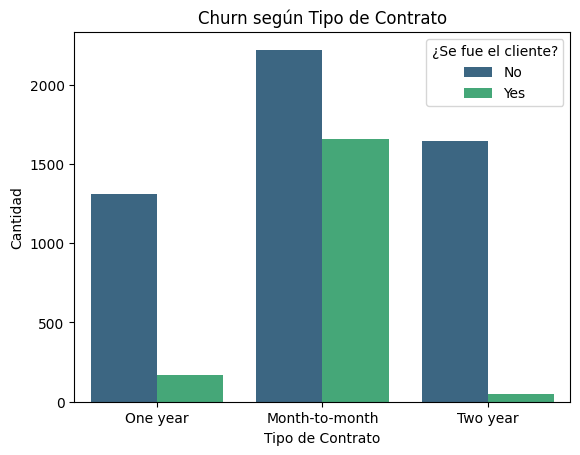

In [66]:
sns.countplot(data=df_limpio, x='account_Contract', hue='Churn', palette='viridis')
plt.title('Churn seg√∫n Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.legend(title='¬øSe fue el cliente?')
plt.show()

Servicios asociados con mayor churn
¬øQu√© tipo de servicios est√°n m√°s asociados con el churn?

In [67]:
servicios_adicionales = ['internet_StreamingTV', 'internet_StreamingMovies',
                         'internet_OnlineSecurity', 'internet_OnlineBackup']

for col in servicios_adicionales:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')
churn_por_servicio(servicios_adicionales, df_limpio)


--- Churn por 'internet_StreamingTV' ---
                      Se quedaron (%)  Se fueron (%)  Total
internet_StreamingTV                                       
No                               75.7           24.3   4336
Yes                              69.9           30.1   2707

--- Churn por 'internet_StreamingMovies' ---
                          Se quedaron (%)  Se fueron (%)  Total
internet_StreamingMovies                                       
No                                   75.6           24.4   4311
Yes                                  70.1           29.9   2732

--- Churn por 'internet_OnlineSecurity' ---
                         Se quedaron (%)  Se fueron (%)  Total
internet_OnlineSecurity                                       
No                                  68.7           31.3   5024
Yes                                 85.4           14.6   2019

--- Churn por 'internet_OnlineBackup' ---
                       Se quedaron (%)  Se fueron (%)  Total
internet_Online

Influencia de combinaciones de servicios en el churn
¬øHay combinaciones de servicios que influyen en la decisi√≥n de irse?

In [68]:
df_limpio['Phone_and_Internet'] = (
    df_limpio['phone_PhoneService'].astype(str) + '_' +
    df_limpio['internet_InternetService'].astype(str)
)

churn_combo = pd.crosstab(df_limpio['Phone_and_Internet'], df_limpio['Churn'], normalize='index') * 100
churn_combo = churn_combo.round(1)

for col in ['No', 'Yes']:
    if col not in churn_combo.columns:
        churn_combo[col] = 0.0

churn_combo = churn_combo[['No', 'Yes']]
churn_combo.columns = ['Se quedaron (%)', 'Se fueron (%)']

churn_combo = churn_combo.sort_values(by='Se fueron (%)', ascending=False)

print("\n--- Churn por combinaci√≥n Phone + Internet ---")
print(churn_combo.to_string())


--- Churn por combinaci√≥n Phone + Internet ---
                    Se quedaron (%)  Se fueron (%)
Phone_and_Internet                                
Yes_Fiber optic                58.1           41.9
No_DSL                         75.1           24.9
Yes_DSL                        83.4           16.6
Yes_No                         92.6            7.4


üìä 3.4 Contratos y permanencia
Churn por tipo de contrato
¬øQu√© tipo de contrato est√° m√°s asociado con la retenci√≥n o abandono?

In [69]:
# Tabla de churn por tipo de contrato
churn_contrato = pd.crosstab(df_limpio['account_Contract'], df_limpio['Churn'], normalize='index') * 100
churn_contrato = churn_contrato.round(1)
churn_contrato.columns = ['Se quedaron (%)', 'Se fueron (%)']
churn_contrato.index.name = 'Tipo de contrato'

print("\n--- Churn por tipo de contrato ---")
print(churn_contrato.to_string())


--- Churn por tipo de contrato ---
                  Se quedaron (%)  Se fueron (%)
Tipo de contrato                                
Month-to-month               57.3           42.7
One year                     88.7           11.3
Two year                     97.2            2.8


Permanencia promedio seg√∫n tipo de contrato
¬øCu√°l es la duraci√≥n promedio de permanencia por tipo de contrato?

In [70]:
# Duraci√≥n promedio de permanencia seg√∫n contrato
tenure_promedio = df_limpio.groupby('account_Contract')['customer_tenure'].mean().round(1)
print("\n--- Duraci√≥n promedio de permanencia por tipo de contrato (en meses) ---")
print(tenure_promedio.to_string())


--- Duraci√≥n promedio de permanencia por tipo de contrato (en meses) ---
account_Contract
Month-to-month    18.0
One year          42.0
Two year          56.7


Churn seg√∫n tiempo de permanencia
¬øC√≥mo var√≠a el churn seg√∫n el tiempo que lleva el cliente en la compa√±√≠a?

In [71]:
# C√°lculo del churn promedio por mes de permanencia
churn_por_tenure = df_limpio.groupby('customer_tenure')['Churn'].apply(lambda x: (x == 'Yes').mean())

print("\n--- Churn promedio por meses de permanencia ---")
print(churn_por_tenure.head(20).round(3).to_string())


--- Churn promedio por meses de permanencia ---
customer_tenure
0     0.000
1     0.620
2     0.517
3     0.470
4     0.472
5     0.481
6     0.364
7     0.389
8     0.341
9     0.387
10    0.388
11    0.313
12    0.325
13    0.349
14    0.316
15    0.374
16    0.350
17    0.299
18    0.247
19    0.260


Gr√°fico de l√≠nea que muestra la tasa de abandono mensual a lo largo del tiempo

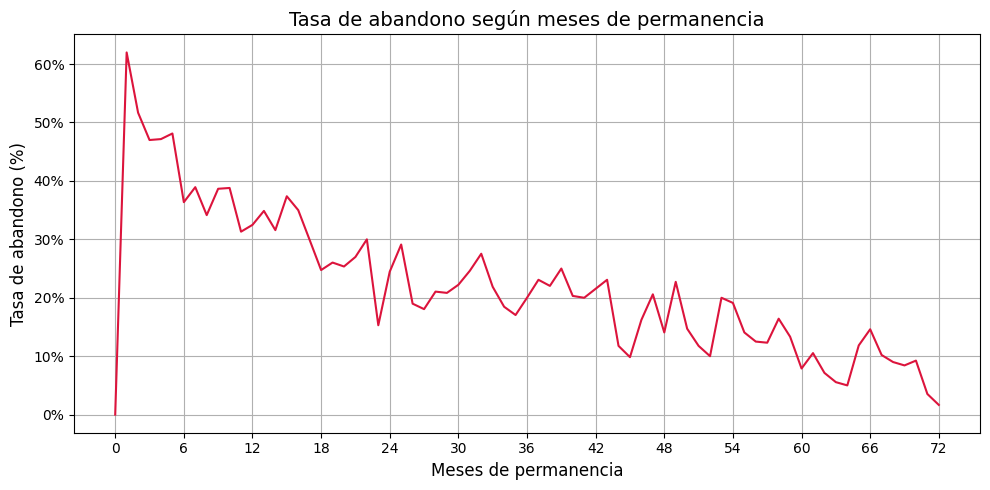

In [72]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=churn_por_tenure.index, y=churn_por_tenure.values * 100, color='crimson')  # ¬°Multiplicamos por 100!

plt.title('Tasa de abandono seg√∫n meses de permanencia', fontsize=14)
plt.xlabel('Meses de permanencia', fontsize=12)
plt.ylabel('Tasa de abandono (%)', fontsize=12)
plt.xticks(ticks=range(0, int(df_limpio['customer_tenure'].max()) + 1, 6))  # marcas cada 6 meses
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())  # Formato del eje Y como %
plt.grid(True)
plt.tight_layout()
plt.show()

Gr√°fico de l√≠nea enfocado solo en los primeros 12 meses

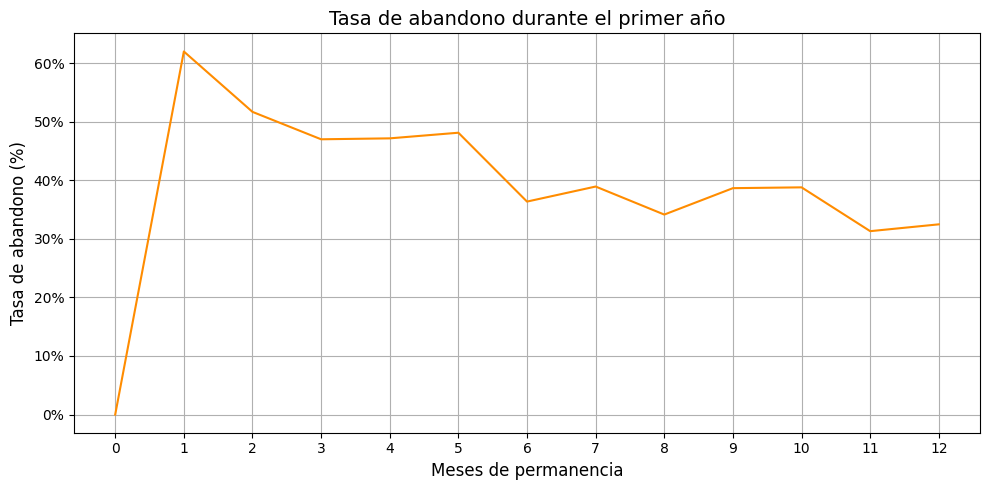

In [73]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=churn_por_tenure.index[:13],  # Solo de 0 a 12 meses
    y=(churn_por_tenure.values[:13] * 100),
    color='darkorange'
)

plt.title('Tasa de abandono durante el primer a√±o', fontsize=14)
plt.xlabel('Meses de permanencia', fontsize=12)
plt.ylabel('Tasa de abandono (%)', fontsize=12)
plt.xticks(ticks=range(0, 13))  # de 0 a 12 meses
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True)
plt.tight_layout()
plt.show()


üìä 3.5 M√©todo de pago
Revisi√≥n de los m√©todos de pago (por si hubo cambios)

In [74]:
print(df_limpio['account_PaymentMethod'].value_counts())

account_PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


Proporci√≥n de churn por m√©todo de pago
¬øHay m√©todos de pago con mayores tasas de abandono?

In [75]:
churn_por_pago = df_limpio.groupby('account_PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print(churn_por_pago)

Churn                            No       Yes
account_PaymentMethod                        
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


¬øEl uso de pago autom√°tico reduce el churn?

In [76]:
# Comparaci√≥n directa entre pagos autom√°ticos y churn
df_limpio['EsPagoAutomatico'] = df_limpio['account_PaymentMethod'].str.contains('automatic', case=False)
print(df_limpio.groupby('EsPagoAutomatico')['Churn'].value_counts(normalize=True).unstack())

Churn                   No       Yes
EsPagoAutomatico                    
False             0.653256  0.346744
True              0.840183  0.159817


¬øQu√© m√©todo es m√°s com√∫n entre quienes permanecen?

In [77]:
df_no_churn = df_limpio[df_limpio['Churn'] == 'No']

metodos_no_churn = df_no_churn['account_PaymentMethod'].value_counts()

print("\n--- M√©todo de pago m√°s com√∫n entre quienes permanecen ---")
print(metodos_no_churn)


--- M√©todo de pago m√°s com√∫n entre quienes permanecen ---
account_PaymentMethod
Mailed check                 1304
Electronic check             1294
Credit card (automatic)      1290
Bank transfer (automatic)    1286
Name: count, dtype: int64


Clientes que se fueron seg√∫n m√©todo de pago

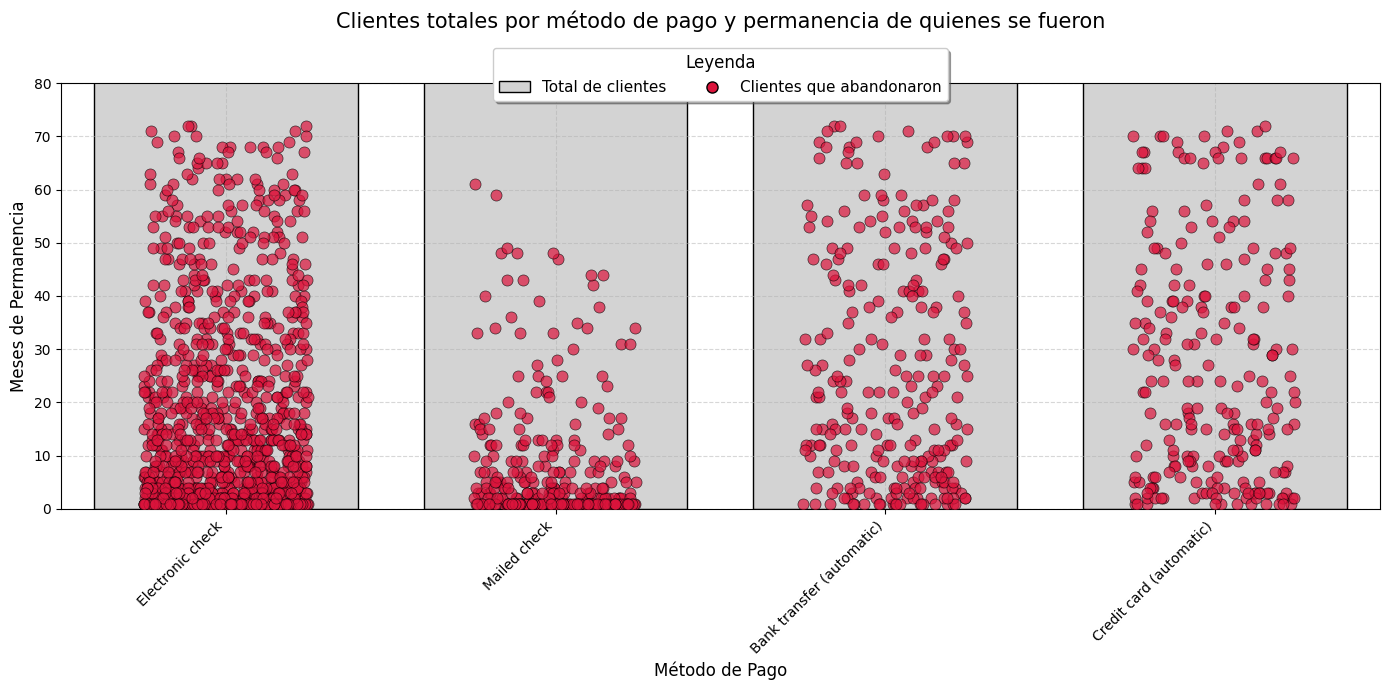

In [78]:
plt.figure(figsize=(14, 7))

df_churn = df_limpio[df_limpio['Churn'] == 'Yes']
orden_metodos = df_limpio['account_PaymentMethod'].value_counts().index
total_por_pago = df_limpio['account_PaymentMethod'].value_counts().reindex(orden_metodos)

sns.barplot(
    x=total_por_pago.index,
    y=total_por_pago.values,
    color='lightgray',
    edgecolor='black'
)

sns.stripplot(
    data=df_churn,
    x='account_PaymentMethod',
    y='customer_tenure',
    order=orden_metodos,
    jitter=0.25,
    size=8,
    color='crimson',
    alpha=0.7,
    linewidth=0.5,
    edgecolor='black'
)

plt.title('Clientes totales por m√©todo de pago y permanencia de quienes se fueron', fontsize=15, pad=40)
plt.xlabel('M√©todo de Pago', fontsize=12)
plt.ylabel('Meses de Permanencia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 80)
plt.grid(True, linestyle='--', alpha=0.5)

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Total de clientes'),
    Line2D([0], [0], marker='o', color='crimson', label='Clientes que abandonaron',
           markerfacecolor='crimson', markersize=8, linestyle='None', markeredgecolor='black')
]

plt.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.10),
    ncol=2,
    fontsize=11,
    title='Leyenda',
    title_fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True
)

plt.tight_layout()
plt.show()

üìä 3.6 An√°lisis de cargos y tenure
Crear columna categ√≥rica de antig√ºedad

In [79]:
df_limpio['grupo_tenure'] = pd.cut(
    df_limpio['customer_tenure'],
    bins=[0, 6, 12, 24, 48, 72],
    labels=['0-6', '6-12', '12-24', '24-48', '48-72']
)

print("Distribuci√≥n de clientes por grupo de antig√ºedad (tenure en meses):\n")
print(df_limpio['grupo_tenure'].value_counts().sort_index().to_string())

Distribuci√≥n de clientes por grupo de antig√ºedad (tenure en meses):

grupo_tenure
0-6      1470
6-12      705
12-24    1024
24-48    1594
48-72    2239


Distribuci√≥n de cargos mensuales por grupo de tenure

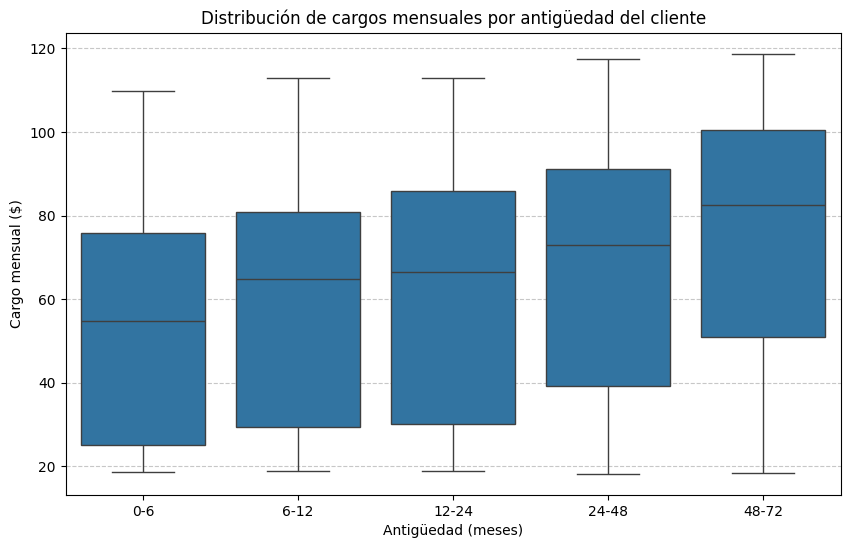

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_limpio, x='grupo_tenure', y='account_Charges_Monthly')
plt.title('Distribuci√≥n de cargos mensuales por antig√ºedad del cliente')
plt.xlabel('Antig√ºedad (meses)')
plt.ylabel('Cargo mensual ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Estad√≠sticas descriptivas de cargos totales

In [81]:

stats_cargos = df_limpio['account_Charges_Total'].describe()
print(stats_cargos)
print(f"\nEl cargo total promedio es de {stats_cargos['mean']:.2f}, con un m√≠nimo de {stats_cargos['min']} y un m√°ximo de {stats_cargos['max']}.")

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: account_Charges_Total, dtype: float64

El cargo total promedio es de 2283.30, con un m√≠nimo de 18.8 y un m√°ximo de 8684.8.


Relaci√≥n entre cargos totales y abandono

In [82]:

promedio_cargos_churn = df_limpio.groupby('Churn')['account_Charges_Total'].mean()
print(promedio_cargos_churn)
print(f"\nLos clientes que abandonaron pagan en promedio {promedio_cargos_churn['Yes']:.2f}, mientras que los que permanecen pagan {promedio_cargos_churn['No']:.2f}.")

Churn
No     2555.344141
Yes    1531.796094
Name: account_Charges_Total, dtype: float64

Los clientes que abandonaron pagan en promedio 1531.80, mientras que los que permanecen pagan 2555.34.


Estad√≠sticas de cargos totales por Churn

In [83]:
print(df_limpio.groupby('Churn')['account_Charges_Total'].describe())

        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.80  


An√°lisis visual de cargos totales por churn

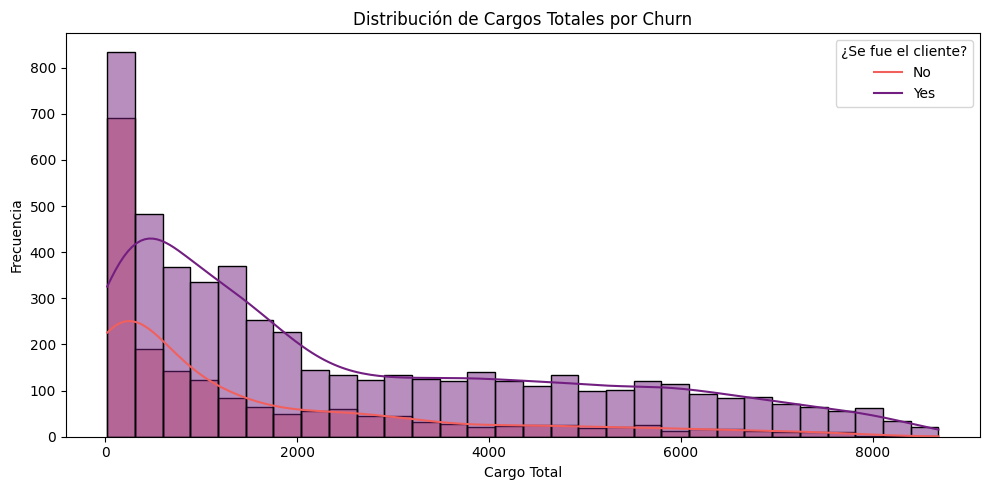

In [84]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_limpio,
    x='account_Charges_Total',
    hue='Churn',
    kde=True,
    palette='magma',
    bins=30,
    multiple='layer'
)
plt.title('Distribuci√≥n de Cargos Totales por Churn')
plt.xlabel('Cargo Total')
plt.ylabel('Frecuencia')
plt.legend(title='¬øSe fue el cliente?', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Relaci√≥n entre permanencia (tenure) y churn

In [85]:
print(df_binario.groupby('Churn')['customer_tenure'].mean())
print("\nCorrelaci√≥n tenure vs churn:")
print(df_binario[['customer_tenure', 'Churn']].corr())

Churn
0    37.569965
1    17.979133
Name: customer_tenure, dtype: float64

Correlaci√≥n tenure vs churn:
                 customer_tenure     Churn
customer_tenure         1.000000 -0.352229
Churn                  -0.352229  1.000000


Relaci√≥n visual entre tenure y cargos totales seg√∫n Churn

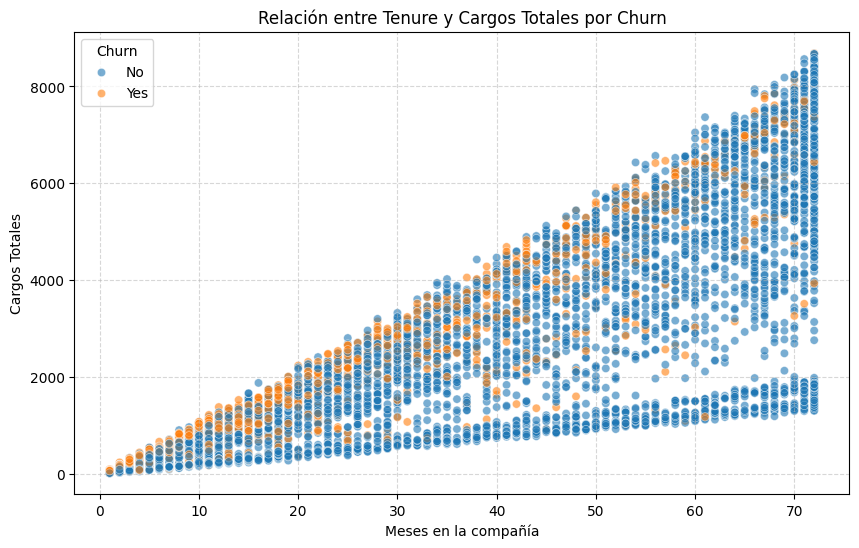

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_limpio,
    x='customer_tenure',
    y='account_Charges_Total',
    hue='Churn',
    alpha=0.6
)
plt.title('Relaci√≥n entre Tenure y Cargos Totales por Churn')
plt.xlabel('Meses en la compa√±√≠a')
plt.ylabel('Cargos Totales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

An√°lisis del m√©todo de pago y su relaci√≥n con el abandono (Churn)

In [90]:
print(df_binario.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias']


¬øEl uso de cheques electr√≥nicos influye en el abandono temprano de clientes?

Crear columna eCheck en df_binario

In [91]:
df_binario['eCheck'] = df_binario['account_PaymentMethod'].str.contains('Electronic check', case=False)
print(df_binario[['account_PaymentMethod', 'eCheck']].head(10))

tasa_churn_echeck = df_binario[df_binario['eCheck']]['Churn'].mean() * 100
tasa_churn_no_echeck = df_binario[~df_binario['eCheck']]['Churn'].mean() * 100

print(f"Tasa de churn con eCheck: {tasa_churn_echeck:.2f}%")
print(f"Tasa de churn sin eCheck: {tasa_churn_no_echeck:.2f}%")

       account_PaymentMethod  eCheck
0               Mailed check   False
1               Mailed check   False
2           Electronic check    True
3           Electronic check    True
4               Mailed check   False
5    Credit card (automatic)   False
6  Bank transfer (automatic)   False
7    Credit card (automatic)   False
8           Electronic check    True
9               Mailed check   False
Tasa de churn con eCheck: 45.29%
Tasa de churn sin eCheck: 17.06%


#üìÑInforme final


üìä An√°lisis del Abandono de Clientes en Telecomunicaciones
1. Informe general
Este an√°lisis explora los factores asociados al abandono de clientes (churn) en una empresa de telecomunicaciones. La tasa de abandono alcanza el 26.54%, lo que refleja una necesidad urgente de implementar estrategias de permanencia.

Los hallazgos muestran que la permanencia est√° estrechamente relacionada con el tipo de contrato, el m√©todo de pago y los servicios contratados. A partir de los patrones identificados, se proponen recomendaciones espec√≠ficas para reducir el churn. Adem√°s, se incluyen advertencias sobre posibles limitaciones y sesgos en la interpretaci√≥n de los datos.

2. Hallazgos Clave
2.1 Churn Global
Clientes que abandonaron: 26.54%
Clientes leales: 73.46%
2.2 Perfil Demogr√°fico
Distribuci√≥n por g√©nero: 50.5% hombres, 49.5% mujeres
Permanencia media similar: ~32 meses
Tasa de churn por g√©nero:
Hombres: 26.5%
Mujeres: 26.6%
Conclusi√≥n: El g√©nero no es un factor determinante en el abandono.

2.3 Servicios Contratados
Internet por fibra √≥ptica: churn elevado (41.9%)
Sin servicio de Internet: churn bajo (7.4%)
Tel√©fono: impacto leve
2.4 Combinaci√≥n de Servicios
M√°s riesgosa: Tel√©fono + Internet por fibra √≥ptica
M√°s estable: Tel√©fono + Sin servicio de Internet
Hip√≥tesis: Algunas combinaciones agravan el riesgo de churn, posiblemente por costos, complejidad del servicio o problemas t√©cnicos acumulados.

2.5 Contrato y Permanencia
Mensual: 42.7% de churn
Anual: 11.3%
Bienal: 2.8%
Tenure y churn:

< 6 meses: 40.8%
60 meses: 6.5%

Hip√≥tesis: Existen diferencias claras en la tasa de abandono seg√∫n el tiempo de permanencia, pero no contamos con datos suficientes para conocer las causas concretas. Es posible que los clientes con mayor antig√ºedad hayan accedido a promociones atractivas o tengan una relaci√≥n m√°s consolidada, mientras que los nuevos clientes podr√≠an estar abandonando por insatisfacci√≥n inicial, onboarding deficiente o expectativas no cumplidas.

Propuesta: Para validar estas ideas, se requiere informaci√≥n adicional como:

Datos de uso del servicio durante los primeros meses
Experiencia de contrataci√≥n y activaci√≥n del servicio
Satisfacci√≥n en etapas tempranas del ciclo de vida del cliente
Adem√°s, los datos muestran que, a pesar de su corta permanencia, estos nuevos clientes tambi√©n tienen cargos totales bajos, lo que sugiere que abandonaron antes de generar una relaci√≥n de valor con la empresa.

2.6 Servicios de Internet
Los servicios como OnlineSecurity y OnlineBackup se asocian a menor churn, lo que sugiere que aportan valor percibido al cliente.

En cambio, StreamingTV y StreamingMovies se relacionan con mayores tasas de churn. Una posible hip√≥tesis es que estos servicios, al no estar incluidos en paquetes completos o requerir pagos adicionales por contenido exclusivo, podr√≠an estar generando insatisfacci√≥n.

Propuesta: Para validar estas hip√≥tesis se requiere informaci√≥n adicional sobre uso real del servicio, accesos restringidos, y experiencia del cliente con el contenido ofrecido.

2.7 M√©todo de Pago
Cheque electr√≥nico (eCheck): churn alto (45.3%)
M√©todos autom√°ticos (tarjeta/cr√©dito o d√©bito bancario): churn bajo (15‚Äì16%)
Este hallazgo revela una brecha importante en la tasa de abandono seg√∫n el m√©todo de pago utilizado. Los clientes que utilizan cheques electr√≥nicos presentan m√°s del doble de tasa de abandono respecto a quienes optan por pagos autom√°ticos.

Hip√≥tesis:

El alto churn entre usuarios de eCheck podr√≠a estar relacionado con una fricci√≥n operativa en el proceso de cobro. En muchos sistemas de pago electr√≥nico tipo ACH (Automated Clearing House), el cliente espera cierto lapso de d√≠as entre la autorizaci√≥n y el d√©bito real. Si la empresa cobra el servicio de forma inmediata tras la solicitud, esto puede:

Provocar rechazos por fondos insuficientes
Generar molestia o desconfianza por la falta de sincronizaci√≥n con las expectativas del cliente
Derivar en una cancelaci√≥n temprana del servicio
Adem√°s, es posible que el momento del cobro mensual no est√© alineado con los ciclos de ingresos del cliente. Por ejemplo:

Si el cobro se ejecuta el d√≠a 20 del mes, pero la remuneraci√≥n laboral del cliente se recibe reci√©n el d√≠a 30 o durante la primera semana del mes siguiente, esto puede provocar rechazos autom√°ticos por fondos insuficientes, incluso si el cliente desea pagar.

Este desajuste temporal puede generar:

Malestar por cargos fallidos o penalidades
Sensaci√≥n de desorganizaci√≥n o falta de control financiero
Riesgo de churn no por insatisfacci√≥n con el servicio, sino por tensiones de liquidez moment√°neas
Conclusi√≥n parcial: El uso de eCheck podr√≠a estar reflejando no solo una elecci√≥n de m√©todo de pago, sino tambi√©n una realidad econ√≥mica del cliente (como baja bancarizaci√≥n, ingresos variables o necesidad de postergar gastos). Esto lo convierte en una variable cr√≠tica para estrategias de retenci√≥n adaptadas a segmentos m√°s sensibles.

Este patr√≥n sugiere una l√≠nea de investigaci√≥n prometedora, pero no puede ser confirmado sin datos adicionales sobre fechas de cobro, comportamiento de pago, rechazos y retroalimentaci√≥n directa de los clientes.

2.8 Cargos y Permanencia
Tenure y TotalCharges: relaci√≥n positiva clara (acumulaci√≥n l√≥gica)
MonthlyCharges vs churn: no se observa una correlaci√≥n fuerte
3. Recomendaciones
Estrategias de Retenci√≥n
Implementar onboarding y seguimiento a nuevos clientes (0‚Äì6 meses)
Promover servicios de valor agregado como seguridad en l√≠nea
Identificar combinaciones de servicios con alto riesgo y redise√±ar paquetes
Expectativa de Pagos
Fomentar pagos autom√°ticos con descuentos o tarifas fijas
Reducir el uso de cheques electr√≥nicos mediante incentivos a la migraci√≥n digital
Ajustar la fecha de cobro mensual para alinearla con los ingresos del cliente, o permitir que el cliente elija su fecha de pago
4. Limitaciones del An√°lisis
Informaci√≥n no disponible
Preferencias de contenido (TV, pel√≠culas, deportes)
Variables sociodemogr√°ficas clave (ingresos, educaci√≥n, ocupaci√≥n)
Fechas de alta y baja para estudiar patrones temporales
Motivos expl√≠citos de cancelaci√≥n (precio, insatisfacci√≥n, falta de uso)
M√©tricas de satisfacci√≥n del cliente (quejas, soporte)
Estas limitaciones dificultan una comprensi√≥n completa de las causas subyacentes del churn. Algunas relaciones detectadas podr√≠an estar influidas por variables no observadas.

5. Consideraciones cr√≠ticas sobre el dataset
Durante el an√°lisis surgieron incoherencias aparentes como:

Clientes nuevos con muy bajo tenure (<6 meses) tienen cargos totales muy bajos pero alta tasa de churn.
No se observan cargos altos en estos nuevos clientes, lo que sugiere que no hubo tiempo suficiente para acumular pagos significativos.
Hip√≥tesis: Muchos clientes nuevos podr√≠an abandonar antes de generar una relaci√≥n de valor, posiblemente por:

Mala experiencia de contrataci√≥n o activaci√≥n del servicio
Problemas t√©cnicos iniciales
Expectativas no cumplidas desde el primer mes
Advertencia t√©cnica:

El dataset no permite validar si estos clientes utilizaron el servicio activamente, ni si existi√≥ un onboarding efectivo. Tampoco podemos verificar si hubo problemas en la captaci√≥n de clientes que generaron altas no efectivas (sin consumo real).

Por lo tanto, las conclusiones deben entenderse como hip√≥tesis informadas, no como afirmaciones determinantes.

Conclusi√≥n Final
El an√°lisis revela que el abandono de clientes est√° fuertemente vinculado al tipo de contrato, m√©todo de pago y servicios contratados. Clientes nuevos y con contratos cortos son los m√°s vulnerables, pero no necesariamente por pagar m√°s, sino por no encontrar valor r√°pidamente.

La estabilidad tarifaria, el acceso a servicios √∫tiles y la experiencia inicial del cliente son claves para fomentar la permanencia.

Mejorar la comunicaci√≥n, ajustar ofertas, personalizar el onboarding y facilitar m√©todos de pago autom√°ticos son estrategias recomendadas para reducir el churn y aumentar la lealtad.